In [1]:
from Pinns_task2 import *
import matplotlib.pyplot as plt
import torch

### Neuron_30

In [2]:
path = "Outputs/"
test = "N_30/"

approx_sol_path = path + test + "approximate_solution_parameters.pth"
approx_coeff_path = path + test + "approximate_coefficient_parameters.pth"
loss_hist_path = path + test + "loss_history.txt"

# Parameters for this test
n_int = 256
n_sb = 64
n_tb = 64

coefficient_neurons = 30

pinn = Pinns(n_int, n_sb, n_tb, coefficient_neurons_=coefficient_neurons)

# Load the NN parameters
pinn.approximate_solution.load_state_dict(torch.load(approx_sol_path))
pinn.approximate_coefficient.load_state_dict(torch.load(approx_coeff_path))

<All keys matched successfully>

#### Plot the loss

------------------------------------
Final loss:	 -1.5836
It took:	 24884  iterations
------------------------------------


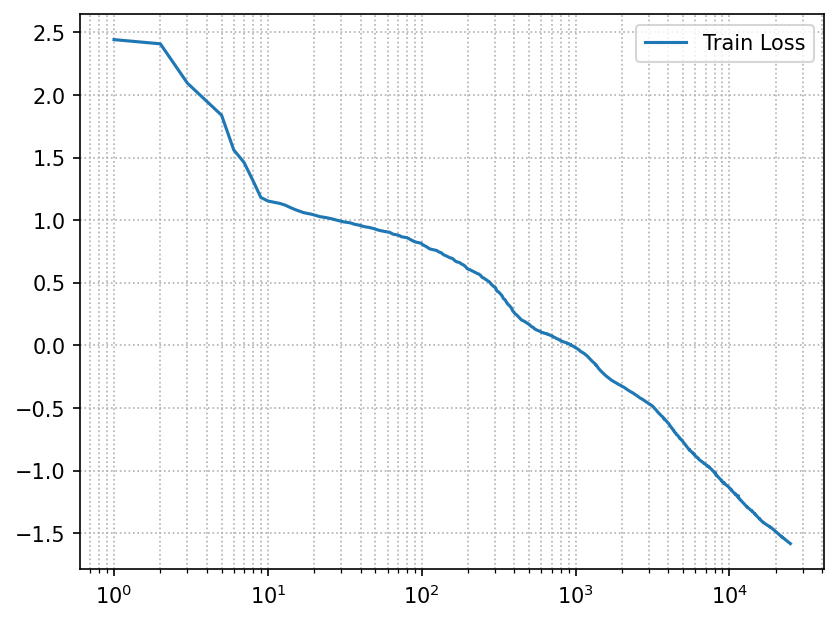

In [3]:
hist = np.loadtxt(loss_hist_path)

plt.figure(dpi=150)
plt.grid(True, which="both", ls=":")
plt.plot(np.arange(1, len(hist) + 1), hist, label="Train Loss")
plt.xscale("log")
plt.legend()

print('------------------------------------')
print("Final loss:\t", round(hist[-1], 4))
print("It took:\t", len(hist), " iterations")
print('------------------------------------')

#### Plot the solution

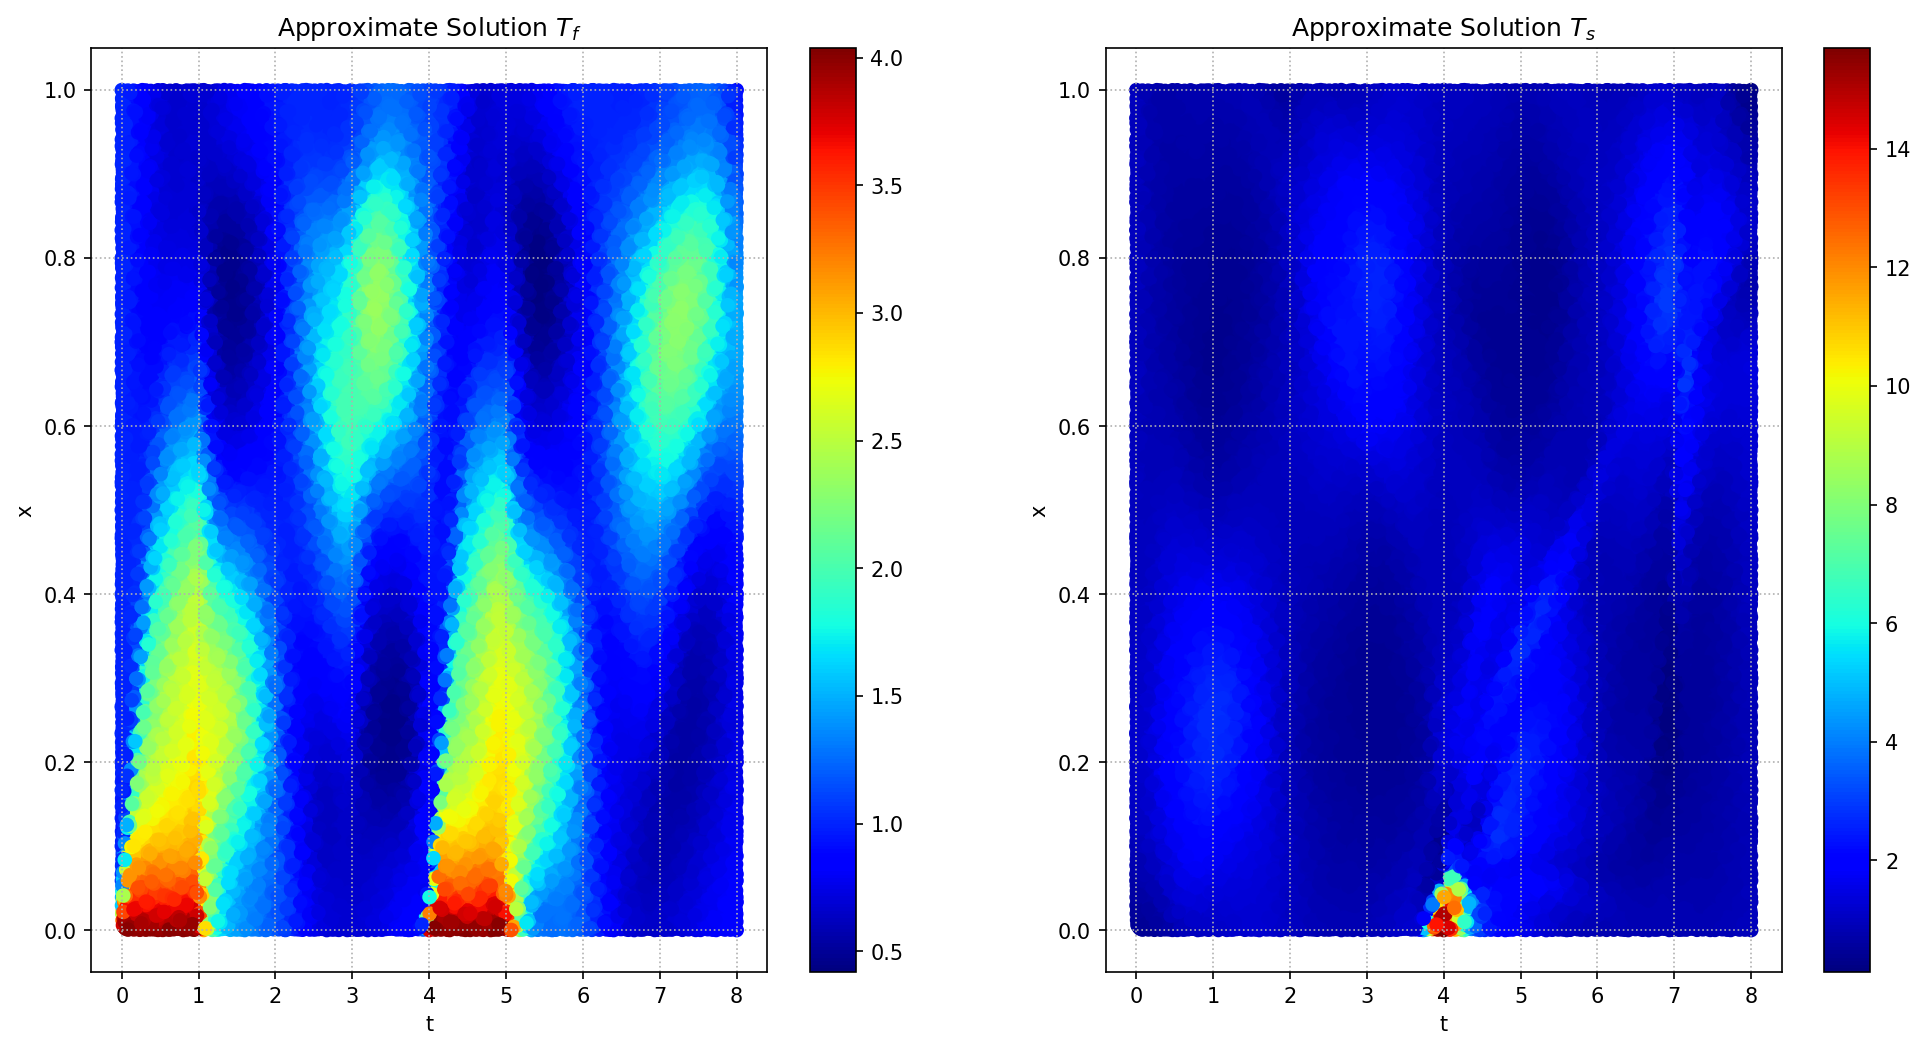

In [4]:
pinn.plotting()

#### Plot the predictions on the data

----------------------------------------------------
Parametes of the error for the Measured Data
----------------------------------------------------
L2 Relative Error Norm:  64.68462371826172 %
mean error:			 0.7210344672203064
std error:			 0.9503492712974548


Text(0.5, 1.0, 'Approximate Values $T_s$')

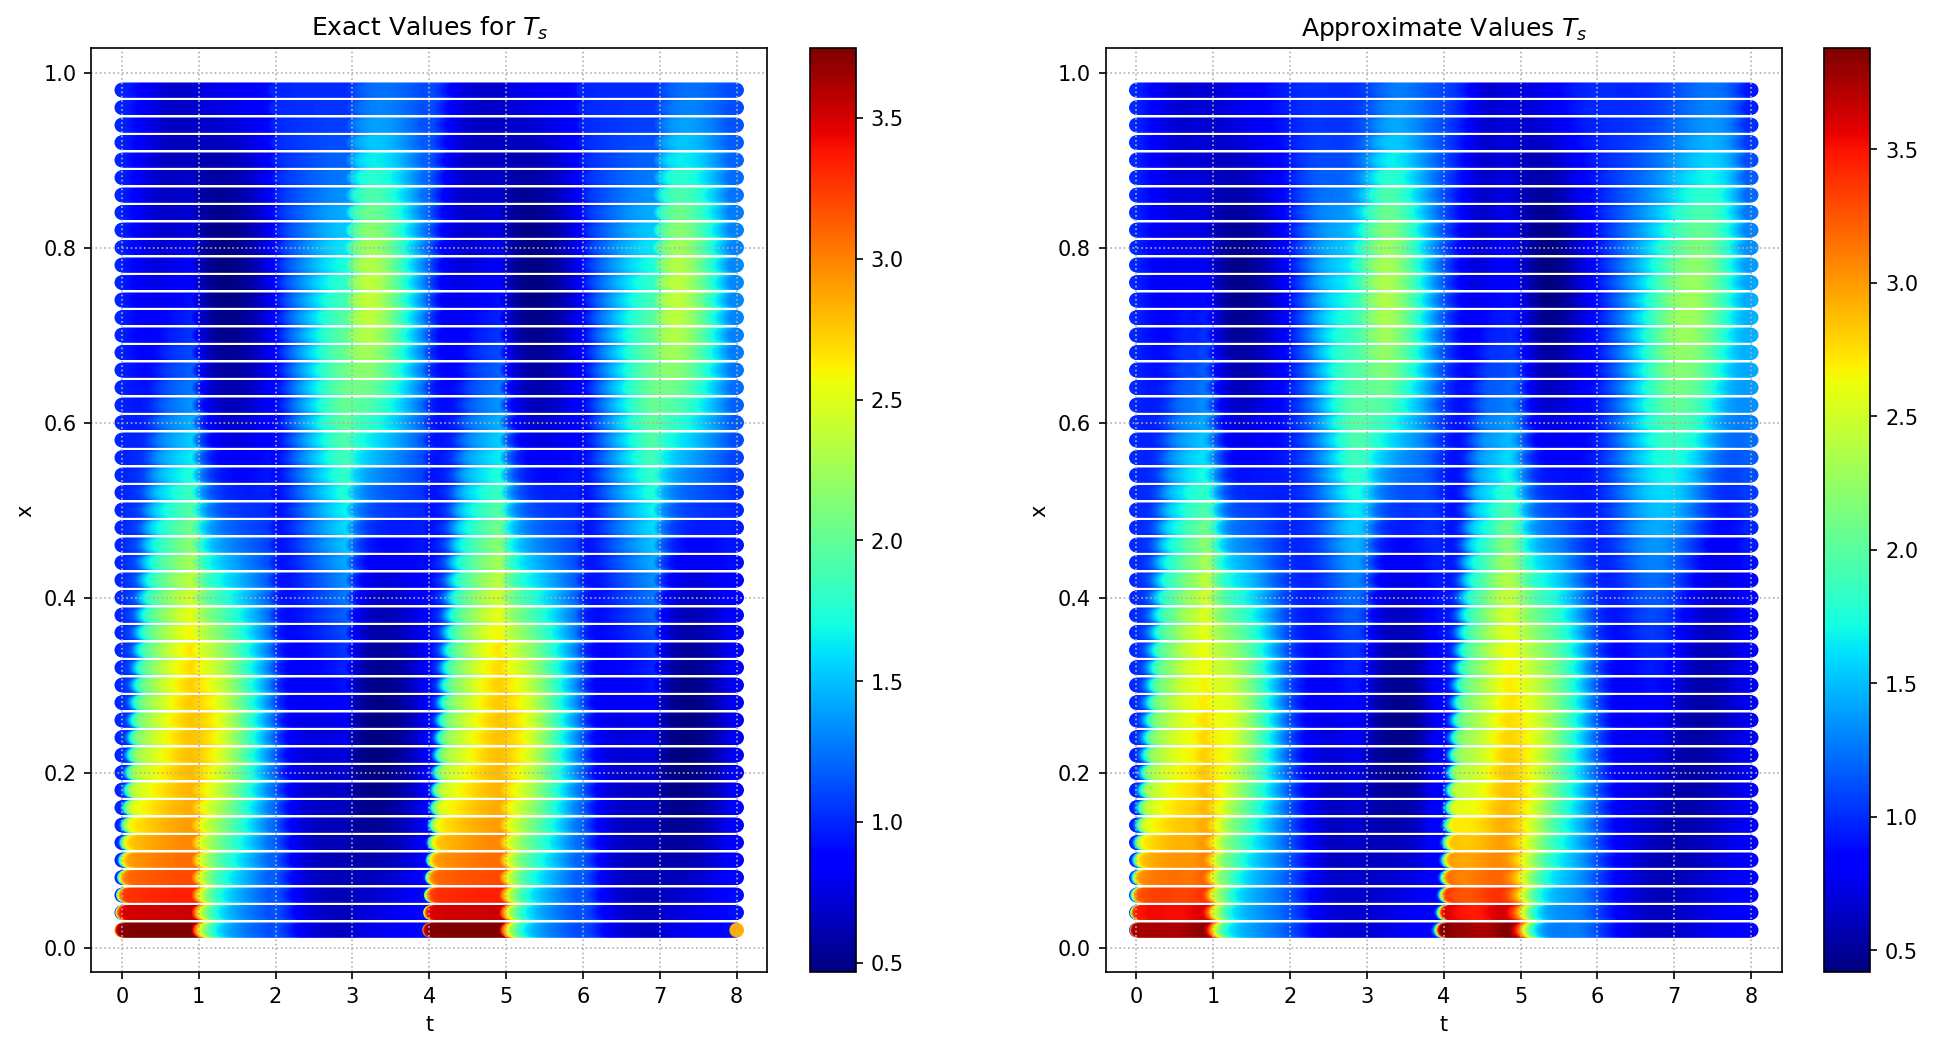

In [5]:
input_meas, exact_meas = pinn.get_measurement_data()

prediction_meas = pinn.approximate_solution(input_meas).reshape(-1, )

print('----------------------------------------------------')
print('Parametes of the error for the Measured Data')
print('----------------------------------------------------')
err = (torch.mean((exact_meas - prediction_meas) ** 2) / torch.mean(exact_meas ** 2)) ** 0.5 * 100
print("L2 Relative Error Norm: ", err.item(), "%")
print('mean error:\t\t\t', torch.mean(torch.abs( (exact_meas-prediction_meas)) ).item())
print('std error:\t\t\t', torch.std( (exact_meas-prediction_meas) ).item())

# Plot the predictions vs the exact solutions
fig, axs = plt.subplots(1, 2, figsize=(16, 8), dpi=150)
im1 = axs[0].scatter(input_meas[:, 0].detach(), input_meas[:, 1].detach(), c=exact_meas.detach(), cmap='jet')
axs[0].set_xlabel("t")
axs[0].set_ylabel("x")
plt.colorbar(im1, ax=axs[0])
axs[0].grid(True, which="both", ls=":")
im2 = axs[1].scatter(input_meas[:, 0].detach(), input_meas[:, 1].detach(), c=prediction_meas.detach(), cmap="jet")
axs[1].set_xlabel("t")
axs[1].set_ylabel("x")
plt.colorbar(im2, ax=axs[1])
axs[1].grid(True, which="both", ls=":")
axs[0].set_title(r"Exact Values for $T_s$")
axs[1].set_title(r"Approximate Values $T_s$")